# Load Specter Embeddings

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from pathlib import PurePath


VECTOR_DOWNSAMPLED = 192

## 1. Load Embeddings

In [2]:
VECTOR_COLS = [str(i) for i in range(768)]
COLUMNS = ['cord_uid'] + VECTOR_COLS
spector_path = PurePath('../data/CORD-19-research-challenge') / "cord_19_embeddings_4_17/cord_19_embeddings_4_17.csv"
%time embeddings = pd.read_csv(spector_path, names=COLUMNS).set_index('cord_uid')
embeddings

Wall time: 8.99 s


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
cord_uid,,,,,,,,,,,,,,,,,,,,,
xqhn0vbp,0.277109,-2.974946,1.103587,9.312441,1.301328,-4.281131,-0.531885,-4.497644,-0.696714,3.888403,...,-0.319249,4.262276,2.845274,-1.656342,-2.584434,-4.678826,3.175534,4.890424,-1.488285,-1.301303
gi6uaa83,-0.344760,-4.762074,3.647769,2.616938,3.856543,-0.460272,0.899565,2.284138,0.590927,2.861983,...,-0.185362,0.603534,1.475987,1.804034,2.819780,-4.039684,-3.027682,0.997251,-0.661524,1.590745
le0ogx1s,-3.257521,-1.720686,1.438893,-1.614458,-3.205178,1.125262,-1.420612,-4.270585,-2.557855,-0.092169,...,-1.691883,0.594955,1.336509,0.036567,-2.065922,0.360089,0.832659,2.954574,-4.601091,-1.097578
fy4w7xz8,0.920366,-3.546179,-2.537739,6.372102,0.025263,-1.991629,-0.612892,0.983194,-2.316126,2.078352,...,-0.412801,0.831824,2.101388,3.283052,-3.075248,-4.381618,1.925288,4.607265,-1.254582,-1.320425
0qaoam29,-1.145982,-5.231421,-1.958305,5.035599,-1.601498,-0.756577,1.757929,1.490937,0.192156,-2.802254,...,0.131644,3.836460,1.115987,1.524282,-2.017589,-5.102140,3.864315,1.679577,1.871223,-0.295825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g1ie0ahz,-3.433409,-3.749235,2.627931,6.722021,2.421140,-0.304666,2.537401,0.386311,1.817812,-0.225392,...,-0.461952,2.940046,5.000329,0.804427,-1.819703,-4.804660,3.043671,3.031867,-0.324372,1.951847
4pztbu51,-2.563848,-5.450750,-3.984233,3.611475,0.814137,-2.865904,-0.444170,7.101780,-1.617121,-0.640639,...,-3.650367,-1.732317,0.114043,-1.305225,-0.733271,-3.825388,4.815966,0.438753,-1.763784,2.251519
h10gvuec,-3.629748,-5.997044,1.718844,7.282516,2.634288,-2.974431,2.624807,3.369440,0.337561,-0.318280,...,1.873704,4.364868,2.139483,-1.588971,-1.202641,-5.594512,1.773983,-0.562087,0.510902,-1.378841


In [3]:
embeddings.shape

(52398, 768)

## 2. Downsample Document Vectors

In [4]:
import numpy as np
from sklearn.decomposition import PCA
RANDOM_STATE = 42
N_CLUSTERS = 6
def kmean_labels(docvectors, n_clusters=6, random_state=RANDOM_STATE):
    print('Setting cluster labels')
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=random_state).fit(docvectors)
    return kmeans.labels_, kmeans


def downsample(docvectors, dimensions=2):
    print(f'Downsampling to {dimensions}D embeddings')
    pca = PCA(n_components=dimensions, svd_solver='full')
    docvectors_downsampled = pca.fit_transform(docvectors)
    return np.squeeze(docvectors_downsampled), pca

In [5]:
vectors_downsampled, pca_downsampled = downsample(embeddings,VECTOR_DOWNSAMPLED)

Downsampling to 192D embeddings


## 2. Create Full Spector Annoy Index

In [6]:
from annoy import AnnoyIndex
from pathlib import Path

def cord_support_dir():
    return Path('../cord') / 'cordsupport'

def create_annoy_index(vectors, num_trees=30):
    print('Building Annoy index from vectors', vectors.shape)
    num_papers, vector_length = vectors.shape
    annoy_index = AnnoyIndex(vector_length, 'angular')  
    for i in range(num_papers):
        annoy_index.add_item(i, vectors[i])

    annoy_index.build(num_trees)
    index_path = str((Path(cord_support_dir()) /  f'DocumentIndex{vector_length}.ann').resolve())
    print('Saving annoy index to', index_path)
    annoy_index.save(index_path)
    del annoy_index

create_annoy_index(vectors_downsampled)

Building Annoy index from vectors (52398, 192)
Saving annoy index to D:\Projects\cord19\cord\cordsupport\DocumentIndex192.ann


## 3. Downsample to 2d and 1d, and get cluster ids

In [7]:
vectors_2d, pca_2d = downsample(embeddings,2)
vectors_1d, pca_1d = downsample(embeddings,1)
cluster_ids, kmeans = kmean_labels(embeddings)

Downsampling to 2D embeddings
Downsampling to 1D embeddings
Setting cluster labels


## 4. Save to cord support dir

In [8]:
from pathlib import PurePath
document_vectors = pd.DataFrame({'cluster': cluster_ids,
                                 'x': vectors_2d[:,0],
                                 'y':  vectors_2d[:,1],
                                 '1d': vectors_1d.tolist(),
                                 '2d': vectors_2d.tolist()
                                }, index=embeddings.index)
document_vectors.to_parquet(PurePath(cord_support_dir()) / 'DocumentVectors.pq', compression='gzip')

## 5. Load Document Vectors

In [9]:
document_vectors = pd.read_parquet(PurePath(cord_support_dir()) / 'DocumentVectors.pq')
assert len(document_vectors) == len(embeddings), \
        f'The document vectors {len(document_vectors)} and the embeddings {len(embeddings)} are not the same length'

In [10]:
document_vectors

,cluster,x,y,1d,2d
cord_uid,,,,,
xqhn0vbp,2,-17.269128,12.837213,-17.269128,"[-17.269127503226773, 12.837213480638773]"
gi6uaa83,2,1.455248,-2.442881,1.455248,"[1.4552480459547201, -2.442881335800208]"
le0ogx1s,5,31.188930,8.841599,31.188930,"[31.188929601092287, 8.84159876058937]"
fy4w7xz8,0,-16.417409,16.164039,-16.417409,"[-16.41740903878668, 16.164038598826554]"
0qaoam29,2,-12.380730,15.987687,-12.380730,"[-12.380729738527748, 15.987686845180516]"
...,...,...,...,...,...
g1ie0ahz,3,-26.309859,-14.082772,-26.309859,"[-26.30985889606641, -14.082771754546126]"
4pztbu51,5,6.127378,23.629600,6.127378,"[6.127377753757681, 23.62960037308139]"
h10gvuec,2,-11.407452,13.061289,-11.407452,"[-11.40745155692994, 13.061289148202349]"


## Chart

In [27]:
import altair as alt

alt.Chart(document_vectors.sample(5000)).mark_circle(opacity=0.5, size=25).encode(
    x=alt.X('x', axis=None),
    y=alt.Y('y', axis=None),
    color=alt.Color('cluster:N', legend=None),
).configure_axis(
    grid=False
).configure_view(
        strokeWidth=0
).properties(
    title='COVID-19 Research Papers'
)

alt.Chart(...)

In [12]:
from cord import ResearchPapers

D:\Projects\cord19\cord\cordsupport\DocumentIndex192.ann


In [13]:
metadata = ResearchPapers.load_metadata()

Loading metadata from ..\data\CORD-19-research-challenge
Cleaning metadata
Applying tags to metadata


In [14]:
COLS = ['cord_uid', 'title','covid_related','virus','coronavirus','sars', 'cluster']
docs = document_vectors.merge(metadata, on='cord_uid', how='left')[COLS]

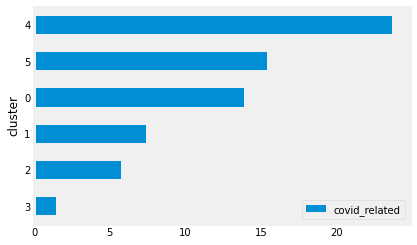

In [15]:
cluster_pct = docs[['cluster', 'covid_related']].groupby('cluster').sum() * 100 / \
                    docs[['cluster', 'covid_related']].groupby('cluster').count()
import matplotlib.style as style
style.use('fivethirtyeight')
cluster_pct.sort_values('covid_related').plot.barh(grid=False);

### Top Cluster

In [16]:
top_cluster = cluster_pct[cluster_pct.covid_related ==cluster_pct.covid_related.max()].index[0]
pd.options.display.max_rows = 400